Dataset shape: (289, 1147)
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0

/tmp/ipython-input-1641617988.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_transposed.index = pd.to_datetime(df_transposed.index, errors="coerce")


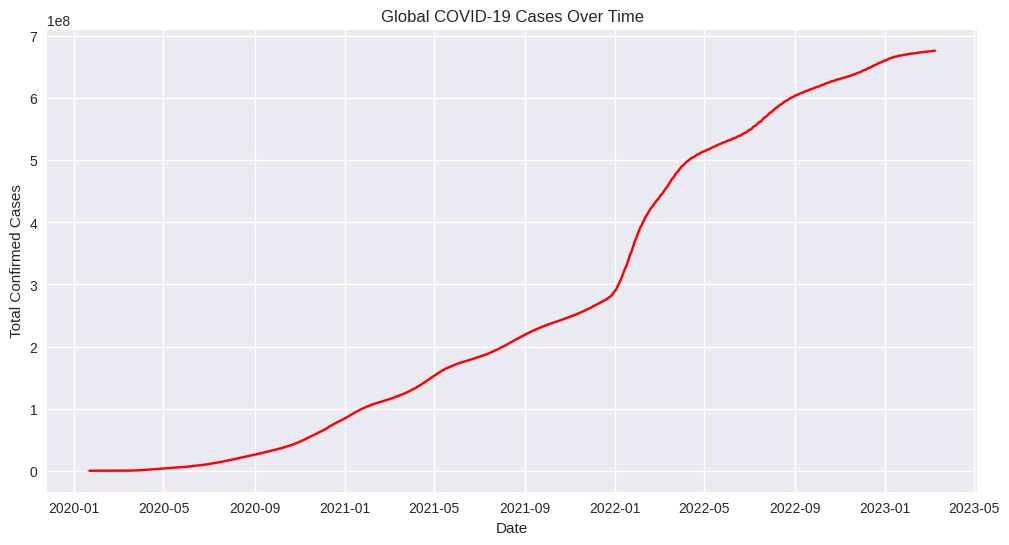

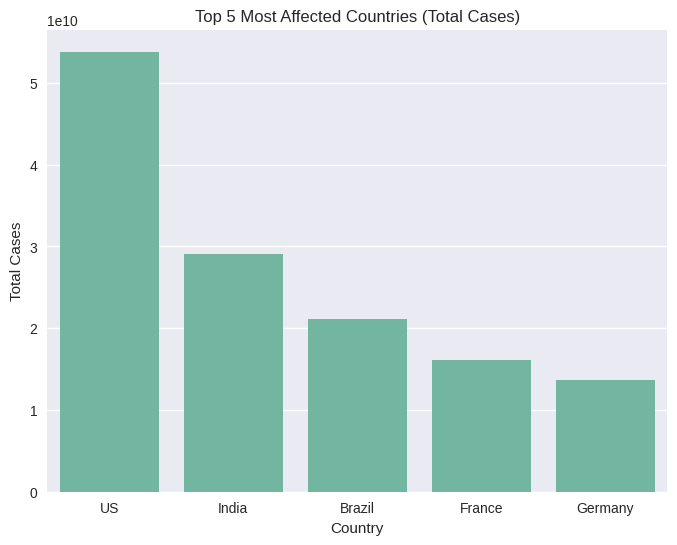

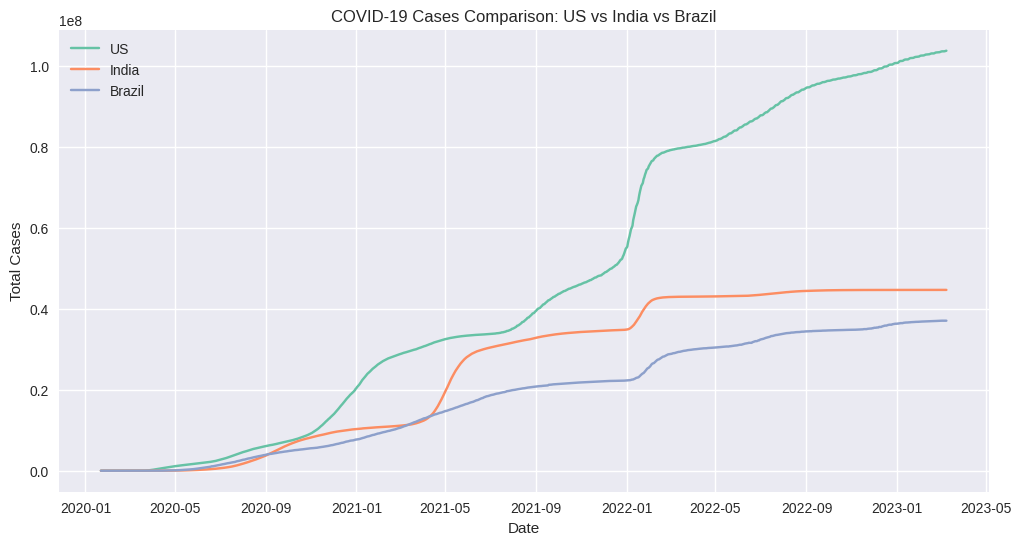

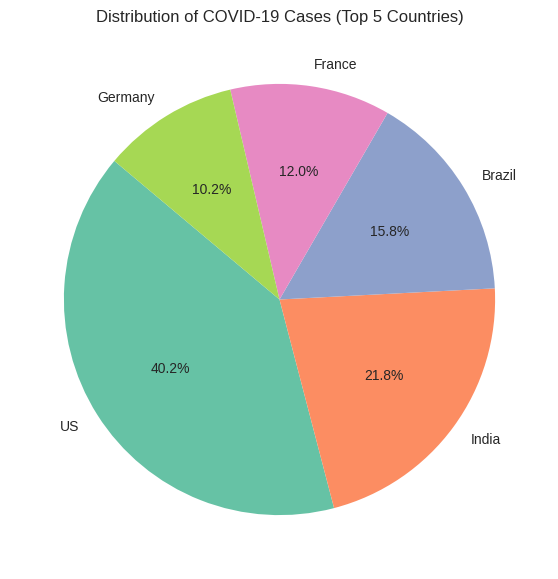

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print(df.head())

df_country = df.groupby("Country/Region").sum(numeric_only=True)

df_transposed = df_country.T

df_transposed.index = pd.to_datetime(df_transposed.index, errors="coerce")

df_transposed = df_transposed.dropna()

print("\nData after cleaning:")
print(df_transposed.head())

global_cases = df_transposed.sum(axis=1)

plt.figure(figsize=(12,6))
plt.plot(global_cases.index, global_cases.values, color="red")
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)
plt.show()

top_countries = df_country.sum(axis=1).sort_values(ascending=False).head(5)

plt.figure(figsize=(8,6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 5 Most Affected Countries (Total Cases)")
plt.ylabel("Total Cases")
plt.xlabel("Country")
plt.show()

countries = ["US", "India", "Brazil"]
plt.figure(figsize=(12,6))

for c in countries:
    plt.plot(df_transposed.index, df_transposed[c], label=c)

plt.title("COVID-19 Cases Comparison: US vs India vs Brazil")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(7,7))
plt.pie(top_countries.values, labels=top_countries.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of COVID-19 Cases (Top 5 Countries)")
plt.show()